<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Auto_Model_Training_and_Evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table Content**


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Data Loading</a></li>
        <li><a href="#pre-processing">Dropping feature</a></li>
         <li><a href="#pre-processing">Convert target variable into binary Form</a></li>
        <li><a href="#setting_up_tree">Data Imbalanced problem </a></li>
        <li><a href="#modeling">Missing Values</a></li>
         <li><a href="#modeling">Inconsistent data/Irrelevant features</a></li>
        <li><a href="#prediction">Hot Encoding</a></li>
        <li><a href="#evaluation">Outlier Detection</a></li>
        <li><a href="#evaluation">Auto Model Training and Evaluation
        <ul>
        <li><a href="#evaluation">Pycaret</a></li>
        <li><a href="#evaluation">Random Forest</a></li>
        <li><a href="#evaluation">Support Vector Machine</a></li>
         <li><a href="#evaluation">Logistic Regression</a></li>
         <li><a href="#evaluation">KNN</a></li>
         <li><a href="#evaluation">Naive Bayes</a></li>
         <li><a href="#evaluation">Deep Neural Multilayer Perceptron (MLP)</a></li>
         <li><a href="#evaluation">Gradient Boosting</a></li>
         <li><a href="#evaluation">ExtraTreesClassifier</a></li>
         <li><a href="#evaluation">LGBM Classifer</a></li>
         <li><a href="#evaluation">CatBoost</a></li>
    </ul>
</div>
<br>
<hr>


# **1- Introduction** 

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

# **Import libaray**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# **2- Data Loading**

## **2.1 Data Loading from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Water Brone diesease/Malyria_2-21-2021.csv',encoding = 'latin')

In [ ]:
Train_data

# **3- Dropping feature**

Dropping feature usually isn’t recommended because you’re losing information. But if you’re sure that the column isn’t important, or simply has too many missing values, you can choose to drop them. For example, for this dataset, the host_name column was removed for ethical reasons, and id was removed because it was was unnecessary.
To drop features, use drop and set axis to 1 and inplace to true. Axis is 1 because we want to drop columns (0 means row), and inplace is True because you're transforming it directly on your dataset.

## **3.1 Drop Index Columns**

In [ ]:
Train_data=Train_data.reset_index()
Train_data=Train_data.drop(columns=['index'])

## **3.2 Drop Multiple featurs**

In [ ]:
New5=Train_data.drop(Train_data.columns[[0,1,3,4,5,6,7,10,17]], axis=1, inplace=True)

# **4-Convert target variable into binary Form**

In [ ]:
Train_data['RESULT_TEXT'].replace({'Negative': 0, 'Positive': 1},inplace = True)

# **5- Data Imbalanced problem**


## **5.1 Check Imbalanced Problem in Data**

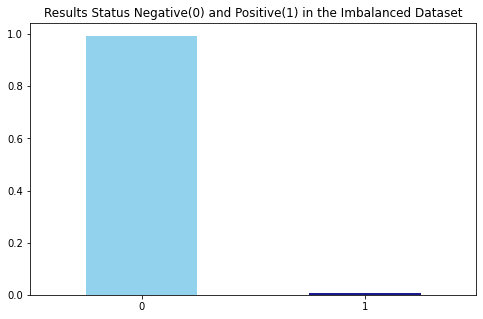

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Positive(1) in the Imbalanced Dataset')
plt.show()

## **5.2 Data resample**

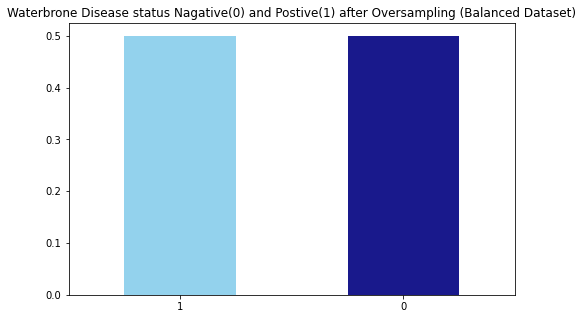

In [ ]:
from sklearn.utils import resample
no = Train_data[Train_data.RESULT_TEXT == 0]
yes = Train_data[Train_data.RESULT_TEXT == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (8,5))
oversampled.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Waterbrone Disease status Nagative(0) and Postive(1) after Oversampling (Balanced Dataset)')
plt.show()

#**6- Missing Values** 

## **6.2- Check missing Value**

In [ ]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
REPORT_VERIFIED,796,0.01749
RESULT_TEXT,0,0.00000
CPT_ID.1,0,0.00000
RESULT_VALUE,0,0.00000


# **8-Hot Encoding**

In [ ]:
oversampled.select_dtypes(include=['object']).columns


Index([], dtype='object')

In [ ]:
# Impute categorical var with Mode
oversampled['MRNO'] = oversampled['MRNO'].fillna(oversampled['MRNO'].mode()[0])
oversampled['AGE'] = oversampled['AGE'].fillna(oversampled['AGE'].mode()[0])
oversampled['GENDER'] = oversampled['GENDER'].fillna(oversampled['GENDER'].mode()[0])
oversampled['DISTRICT'] = oversampled['DISTRICT'].fillna(oversampled['DISTRICT'].mode()[0])
oversampled['TEHSIL'] = oversampled['TEHSIL'].fillna(oversampled['TEHSIL'].mode()[0])
oversampled['REPORT_VERIFIED'] = oversampled['REPORT_VERIFIED'].fillna(oversampled['REPORT_VERIFIED'].mode()[0])
oversampled['RESULT_VALUE'] = oversampled['RESULT_VALUE'].fillna(oversampled['RESULT_VALUE'].mode()[0])

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

# **9-Outlier detection**

Outliers can be dangerous as they can skew your model and give you predictions that are biased and erroneous.
The best way to find outliers is to use the describe function and look at information such as maximum and mean.

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MRNO               6094.25
AGE                  28.00
GENDER                1.00
DISTRICT              3.00
TEHSIL                7.00
REPORT_VERIFIED    9501.50
CPT_ID             2200.00
RESULT_VALUE          0.00
CPT_ID.1              0.00
RESULT_TEXT           1.00
dtype: float64


In [ ]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(34554, 10)

In [ ]:
MiceImputed

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
1,10373.0,41.0,1.0,0.0,1.0,21463.0,1.000000e+15,1.0,1.000000e+15,0.0
2,10373.0,41.0,1.0,0.0,1.0,21462.0,1.000000e+15,1.0,1.000000e+15,0.0
3,10312.0,23.0,1.0,0.0,1.0,10809.0,1.000000e+15,1.0,1.000000e+15,0.0
4,10313.0,40.0,1.0,0.0,1.0,12521.0,1.000000e+15,1.0,1.000000e+15,0.0
5,10315.0,26.0,0.0,0.0,1.0,2063.0,1.000000e+15,1.0,1.000000e+15,0.0
...,...,...,...,...,...,...,...,...,...,...
12343,3001.0,65.0,0.0,0.0,1.0,3669.0,1.000000e+15,1.0,1.000000e+15,1.0
15056,2531.0,29.0,0.0,0.0,1.0,19534.0,1.000000e+15,1.0,1.000000e+15,1.0
13513,7286.0,84.0,1.0,0.0,1.0,8439.0,1.000000e+15,1.0,1.000000e+15,1.0
8974,744.0,9.0,1.0,0.0,1.0,10606.0,1.000000e+15,1.0,1.000000e+15,1.0


# **10- Data spliting**

In [ ]:
X=MiceImputed.drop('RESULT_TEXT',axis=1)

In [ ]:
y=MiceImputed[['RESULT_TEXT']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [ ]:
X_train

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1
12545,3828.0,40.0,1.0,0.0,1.0,480.0,1.000000e+15,1.0,1.000000e+15
15205,3083.0,3.0,1.0,0.0,1.0,1566.0,1.000000e+15,1.0,1.000000e+15
13513,7286.0,84.0,1.0,0.0,1.0,8439.0,1.000000e+15,1.0,1.000000e+15
6203,1344.0,41.0,0.0,0.0,1.0,15572.0,1.000000e+15,1.0,1.000000e+15
3609,2730.0,20.0,1.0,0.0,1.0,21042.0,1.000000e+15,1.0,1.000000e+15
...,...,...,...,...,...,...,...,...,...
19544,8598.0,39.0,0.0,0.0,1.0,16720.0,1.000000e+15,1.0,1.000000e+15
19033,6678.0,21.0,0.0,0.0,1.0,5675.0,1.000000e+15,1.0,1.000000e+15
96,245.0,19.0,1.0,0.0,1.0,7501.0,1.000000e+15,1.0,1.000000e+15
14140,9424.0,33.0,1.0,0.0,1.0,6097.0,1.000000e+15,1.0,1.000000e+15


# **11- Auto Model Training and Evaluation**

## **11.1-PyCaret**

PyCaret is an open-source, low-code machine learning library and end-to-end model management tool built-in Python for automating machine learning workflows. It is incredibly popular for its ease of use, simplicity, and ability to build and deploy end-to-end ML prototypes quickly and efficiently.PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few lines only. This makes the experiment cycle exponentially fast and efficient [1]

PyCaret is simple and easy to use. All the operations performed in PyCaret are sequentially stored in a Pipeline that is fully automated for deployment. Whether it’s imputing missing values, one-hot-encoding, transforming categorical data, feature engineering, or even hyperparameter tuning, PyCaret automates all of it.

PyCaret is an open-source, low-code machine learning library and end-to-end model management tool built-in Python for automating machine learning workflows. It is known for its ease of use, simplicity, and ability to quickly and efficiently build and deploy end-to-end ML prototypes.
PyCaret is an alternate low-code library that can replace hundreds of code lines with few lines only. This makes the experiment cycle exponentially fast and efficient[4]

![](https://drive.google.com/uc?export=view&id=1qj-WAAtNj7hDl6-o0Jg3gGS4jR1IaCGz)

### **Installing Pycaret**

In [ ]:
#capture #suppresses the displays
# install the full version
!pip install pycaret[full]

In [ ]:
!pip install pyyaml==5.4.1


By installing the full version of pycaret, all the optional dependencies as listed here are also installed.

###**Import the necessary packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 
import pycaret
from pycaret.regression import*
from pycaret.classification import*


### **Data Preparation** [3]

Common to all modules in PyCaret, the setup is the first and the only mandatory step in any machine learning experiment using PyCaret. This function takes care of all the data preparation required prior to training models. Besides performing some basic default processing tasks, PyCaret also offers a wide array of pre-processing features. To learn more about all the preprocessing functionalities in PyCaret, you can see this link.

In [ ]:
from pycaret.regression import *
s = setup(MiceImputed, target = 'RESULT_TEXT', transform_target = True, log_experiment = True, experiment_name = 'diamond')

,Description,Value
0,session_id,5025
1,Target,RESULT_TEXT
2,Original Data,"(34554, 10)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(24187, 9)"


When you initialize the setup function in PyCaret, it profiles the dataset and infers the data types for all input features. If all data types are correctly inferred, you can press enter to continue.[4]

Notice that:[4]

- I have passed log_experiment = True and experiment_name = 'diamond' , this will tell PyCaret to automatically log all the metrics, hyperparameters, and model artifacts behind the scene as you progress through the modeling phase. This is possible due to integration with MLflow.

- Also, I have used transform_target = True inside the setup. PyCaret will transform the Price variable behind the scene using box-cox transformation. It affects the distribution of data in a similar way as log transformation (technically different). If you would like to learn more about box-cox transformations, you can refer to this link.

### **Classificaiton**

**Model Training & Selection**

Now that data is ready for modeling, let’s start the training process by using compare_models function. It will train all the algorithms available in the model library and evaluates multiple performance metrics using k-fold cross-validation.*italicized text*

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(MiceImputed, target = 'RESULT_TEXT', session_id=123, log_experiment = True, experiment_name = 'diamond') 

setup function in PyCaret, profiles the dataset and infers the data types for all input features. It is the first and the only mandatory step to start any machine learning experiment in PyCaret.

**Model Evulaiton**

This function trains all the available models in the model library using default hyperparameters and evaluates performance metrics using cross-validation. The number of folds can be defined using the foldparameter (default = 10 folds). The table is sorted (highest to lowest) by the metric of choice which can be defined using the sortparameter(in this case we have sorted it on RMSE)
n_select parameter in the setup function controls the return of trained models. In this case, I am setting it to 15, meaning return the top 15 models as a list. pull function in the second line stores the output of compare_models as pd.DataFrame .

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9999,1.0000,0.9990,0.9995,0.9992,0.9992,1.480
et,Extra Trees Classifier,0.9994,1.0000,1.0000,0.9987,0.9993,0.9988,0.9988,1.022
xgboost,Extreme Gradient Boosting,0.9987,1.0000,1.0000,0.9970,0.9985,0.9974,0.9974,3.984
catboost,CatBoost Classifier,0.9986,0.9999,1.0000,0.9968,0.9984,0.9972,0.9972,9.749
dt,Decision Tree Classifier,0.9983,0.9986,1.0000,0.9962,0.9981,0.9966,0.9966,0.058
lightgbm,Light Gradient Boosting Machine,0.9959,0.9998,1.0000,0.9906,0.9953,0.9917,0.9917,0.273
knn,K Neighbors Classifier,0.9919,0.9980,1.0000,0.9815,0.9907,0.9835,0.9836,0.190
gbc,Gradient Boosting Classifier,0.9408,0.9850,0.9363,0.9267,0.9314,0.8794,0.8795,1.552
ada,Ada Boost Classifier,0.8112,0.9100,0.7219,0.8170,0.7664,0.6090,0.6124,0.597
lda,Linear Discriminant Analysis,0.6002,0.6324,0.2029,0.6021,0.3032,0.1111,0.1434,0.057


[]

**Select Best Model**


In [ ]:
best= compare_models(n_select = 2, sort= 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9999,1.0000,0.9990,0.9995,0.9992,0.9992,1.496
et,Extra Trees Classifier,0.9994,1.0000,1.0000,0.9987,0.9993,0.9988,0.9988,1.031
xgboost,Extreme Gradient Boosting,0.9987,1.0000,1.0000,0.9970,0.9985,0.9974,0.9974,6.928
catboost,CatBoost Classifier,0.9986,0.9999,1.0000,0.9968,0.9984,0.9972,0.9972,9.796
dt,Decision Tree Classifier,0.9983,0.9986,1.0000,0.9962,0.9981,0.9966,0.9966,0.057
lightgbm,Light Gradient Boosting Machine,0.9959,0.9998,1.0000,0.9906,0.9953,0.9917,0.9917,0.278
knn,K Neighbors Classifier,0.9919,0.9980,1.0000,0.9815,0.9907,0.9835,0.9836,0.208
gbc,Gradient Boosting Classifier,0.9408,0.9850,0.9363,0.9267,0.9314,0.8794,0.8795,1.577
ada,Ada Boost Classifier,0.8112,0.9100,0.7219,0.8170,0.7664,0.6090,0.6124,0.605
lda,Linear Discriminant Analysis,0.6002,0.6324,0.2029,0.6021,0.3032,0.1111,0.1434,0.056


In [ ]:
compare_model_result = pull()



since the RandomForestregressor was evaluated to have a comparatively better Accuracy, let us build the model using RandomForestregressor

**Build the model using Best MODEL**

In [ ]:
rf = create_model('svm')

**Hyperparameter tuning**



In [ ]:
tuned_rf= tune_model(rf, optimize='Accuracy', search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9810,0.9999,1.0,0.9576,0.9783,0.9614,0.9621
1,0.9810,0.9998,1.0,0.9576,0.9783,0.9614,0.9621
2,0.9864,0.9997,1.0,0.9692,0.9844,0.9723,0.9726
3,0.9868,0.9998,1.0,0.9701,0.9848,0.9731,0.9735
4,0.9810,0.9995,1.0,0.9576,0.9783,0.9614,0.9621
5,0.9847,0.9999,1.0,0.9656,0.9825,0.9689,0.9694
6,0.9822,0.9995,1.0,0.9603,0.9797,0.9639,0.9645
7,0.9822,0.9997,1.0,0.9602,0.9797,0.9639,0.9645
8,0.9814,0.9995,1.0,0.9584,0.9788,0.9622,0.9629
9,0.9839,0.9997,1.0,0.9638,0.9816,0.9672,0.9678


Optimum Hyperparameters selected by using Optuna


In [ ]:
tuned_rf

**Plot a Model**

**Analyze the Model Performance**


In [ ]:
plot_model(rf)

**Interpret the results**


In PyCaret, we can interpret the model by SHAP values and correlation plot with just one line of code

In [ ]:
interpret_model(tuned_rf)

**Evaluate the Model**


If we do not want to plot all these visualizations individually, then the PyCaret library has another amazing function — evaluate_model. In this function, you just need to pass the model object and PyCaret will create an interactive window for you to see and analyze the model in all the possible ways:

In [ ]:
evaluate_model(tuned_rf)

**AUC Plot**

In [ ]:
plot_model(rf, plot = 'auc')

**Precision-Recall Curve**

In [ ]:
plot_model(rf, plot = 'pr')

**check the residuals of trained model**


In [ ]:
plot_model(best, plot = 'residuals_interactive')

**Confusion Matrix**

In [ ]:
plot_model(rf, plot = 'confusion_matrix')

**Feature Importance Plot**

In [ ]:
plot_model(rf, plot='feature')

**Cross-validation**

Evaluate the model on the holdout set used for validation


In [ ]:
val_rf_pred = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9789,0.9978,1.0,0.9599,0.9795,0.9578,0.9586


The predictions (Label) made is as follows:-


In [ ]:
val_rf_pred

In [ ]:
y_test

,RESULT_TEXT
9662,1.0
14694,1.0
2120,0.0
11684,1.0
724,1.0
...,...
20342,1.0
21213,1.0
5755,1.0
9849,1.0


**Make predictions on test data**


In [ ]:
# predictions on new datasetRESULT_TEXT
pred_new_rf = predict_model(tuned_rf, data = X_test) #new_data is pd dataframe
#pred_new_rf = pred_new_rf.rename(columns={‘RESULT_TEXT’:’prediction’})
pred_new_rf = pred_new_rf.rename(columns={'RESULT_TEXT':'Prediction'})
pred_new_rf

RandomForestRegressor submission Scores(RMSE) : 4234.403588306586.


**Finalize and Save Pipeline**

Let’s now finalize the best model i.e. train the best model on the entire dataset including the test set and then save the pipeline as a pickle file.

Caution: One final word of caution. Once the model is finalized using finalize_model(), the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after finalize_model() is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use final_rf under predict_model() to compare the information grid with the one above in section 11


In [ ]:
# finalize the model
final_best = finalize_model(rf)

In [ ]:
final_rf = finalize_model(tuned_rf)

In [ ]:
# save model to disk
save_model(final_best, 'diamond-pipeline')

save_model function will save the entire pipeline (including the model) as a pickle file on your local disk. By default, it will save the file in the same folder as your Notebook or script is in but you can pass the complete path as well if you would like:

In [ ]:
save_model(final_best, 'E:/Major Revision/finarf'

### **Regression**

**Model Training & Selection**

In [ ]:
from pycaret.regression import *
s = setup(MiceImputed, target = 'RESULT_TEXT', transform_target = True, log_experiment = True, experiment_name = 'diamond')

In [ ]:
compare_models()


""


[]

**Select Best Model**



In [ ]:
best= compare_models(n_select = 2, sort= 'RMSE')


""


### **Building Ensemble Models using PyCaret**

Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance. In PyCaret, we can create bagging, boosting, blending, and stacking ensemble models with just one line of code. Here we will try with blending.
Blending models is a method of ensembling which uses consensus among estimators to generate final predictions. The idea behind blending is to combine different machine learning algorithms and use a majority vote or the average predicted probabilities in case of classification to predict the final outcome.

In [ ]:
# train a voting regressor dynamically
blender_specific = blend_models(estimator_list = compare_models(n_select = 5))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9984,1.0,1.0,0.9969,0.9984,0.9969,0.9969
1,0.9987,1.0,1.0,0.9975,0.9987,0.9975,0.9975
2,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
3,0.9991,1.0,1.0,0.9981,0.9991,0.9981,0.9981
4,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
5,0.9997,1.0,1.0,0.9994,0.9997,0.9994,0.9994
6,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
7,0.9991,1.0,1.0,0.9981,0.9991,0.9981,0.9981
8,0.9991,1.0,1.0,0.9981,0.9991,0.9981,0.9981
9,0.9997,1.0,1.0,0.9994,0.9997,0.9994,0.9994


The calibrated blending model is as follows:-


In [ ]:
blender_specific

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

**Analyzing model performance in PyCaret**

In [ ]:
plot_model(blender_specific)

**Evaluate the model performance**


In [ ]:
evaluate_model(blender_specific)

**Make predictions on the validation set**


In [ ]:
val_pred = predict_model(blender_specific)

**Make Predictions on unseen data**


In [ ]:
# predictions on new dataset
pred_new = predict_model(blender_specific, data = X_train) #new_data is pd dataframe
pred_new = pred_new.rename(columns={‘RESULT_VALUE’:'prediction'})
pred_new

**Save and Load the Model**


In [ ]:
save_model(blender_specific , ‘/content/drive/MyDrive/blender_specific_saved_06142021’)
# Loading the saved model
blend_saved = load_model(‘/content/drive/MyDrive/blender_specific_saved_06142021’)
pred = blend_saved.predict(test)
pred[:5]

## **12-AutoML-Gs**

**Installing required libraries**


In [ ]:
!pip install automl-gs


**Importing required libraries**


In [ ]:
import automl_gs
from automl_gs import automl_grid_search


**Creating the Model**


In [ ]:
automl_grid_search(MiceImputed, 'RESULT_TEXT')


## **MLflow**[8]

MLflow provides a convenient way to build end-to-end Machine Learning pipelines in production and in this guide

MLflow is an open-source platform for managing the end-to-end machine learning lifecycle or pipeline. It supports multiple Machine Learning libraries, algorithms, deployment tools, and programming languages.

The platform was created by Databricks has over 10,000 stars on GitHub with over 300+ contributors updating the platform on a daily basis.

The MLflow platform provides four major components:


- **MLflow Tracking** — This component is perfect for users looking to select the right hyper-parameters for their model as well as for recording model performance over time. You can record and query model experiments which include your code, data, config, and results.
- **MLflow Projects** — This component is mostly used when trying to reproduce your Machine Learning project on a different machine (similar to Docker images and containers). You can package your data science code in a given format to reproduce model runs on any platform.
- **MLflow Models** — This component is for you if you are looking to deploy Machine Learning models in the real world. With this component, you can deploy machine learning models in diverse serving environments.
- **MLflow Model Registry**— This component is great for you if you are looking to manage multiple Machine Learning models. Using this component, you can store, annotate, discover, and manage Machine Learning models in a central repository.

![](https://drive.google.com/uc?export=view&id=1BoZqaCplUEEJ8fDpk3k167WGi_GmJI_f)

- Individual Data Scientists can use MLflow to track experiments locally, organize code in projects for future reuse, and deploy models using MLflow’s deployment tools.
- Large Organizations can share projects, models, and results with any teams using MLflow.
- Data Science Teams can log metrics and compare results across multiple users working on the same problem
- Production Engineers can deploy models from diverse ML libraries, store the models as files in a management system, and track which run a model came from.

Based on these components, MLflow is designed to be useful for an individual to a large range of people working as a team. Some of its applications are as follows:

If you’re still undecided about learning how to use the platform, you can go over the MLflow components again and figure out if the platform is for you or not.

**Installing MLflow to use with Python**


**Using with Python [4]**

Remember we passed log_experiment = True in the setup function along with experiment_name = 'diamond' . Let’s see the magic PyCaret has done with the help of MLflow behind the scene. To see the magic let’s initiate the MLflow server:

In [ ]:
# within notebook (notice ! sign infront)
!mlflow ui
# on command line in the same folder
#mlflow ui

In [ ]:
!mlflow ui --host 0.0.0.0

[2021-11-01 12:02:00 +0000] [5949] [INFO] Starting gunicorn 20.1.0
[2021-11-01 12:02:00 +0000] [5949] [INFO] Listening at: http://0.0.0.0:5000 (5949)
[2021-11-01 12:02:00 +0000] [5949] [INFO] Using worker: sync
[2021-11-01 12:02:00 +0000] [5952] [INFO] Booting worker with pid: 5952
[2021-11-01 12:06:48 +0000] [5949] [INFO] Handling signal: int
[2021-11-01 12:06:48 +0000] [5952] [INFO] Worker exiting (pid: 5952)

Aborted!
[2021-11-01 12:06:49 +0000] [5949] [INFO] Shutting down: Master


Now open your browser and type “localhost:5000”. It will open a UI like this:

Remember that MLflow supports multiple programming languages and tools such as R-programming language or Python. It also comes with a graphical user interface that you can access from your browser once you successfully install MLflow.[8]

To keep this guide concise and easy to digest, we’ll show you how you can install MLflow to use with Python. To install MLflow, open up your command line/terminal and write the following command:

In [ ]:
!pip install mlflow

Note: You must have Python installed in your system to use pip which is Python’s package manager.

Once you execute the command, MLflow will get installed in your system. You can check if the installation is successful or not by importing MLflow in Python using the following line of code:

In [ ]:
import mlflow

If this line of Python code doesn’t give you an error, then, you’ve successfully installed MLflow to use with Python.

**Component 1: MLflow Tracking**


In [ ]:
# Importing the os library to work with operating system functionalities
import os

# Importing tracking functions from MLflow
from mlflow import log_metric, log_param, log_artifacts

# Logging a parameter (key-value pair)
log_param("param1", 0)

# Logging a metric; metrics can be updated throughout the run
log_metric("foo", 100)
log_metric("foo", 200)
log_metric("foo", 300)

# Create a file called test.text in outputs directory
if not os.path.exists("outputs"):
    os.makedirs("outputs")
with open("outputs/test.txt", "w") as f:
    f.write("hello world!")

# Logging an artifact (output file)
log_artifacts("outputs")

In [ ]:
!mlflow ui

[2021-11-01 12:07:59 +0000] [6004] [INFO] Starting gunicorn 20.1.0
[2021-11-01 12:07:59 +0000] [6004] [INFO] Listening at: http://127.0.0.1:5000 (6004)
[2021-11-01 12:07:59 +0000] [6004] [INFO] Using worker: sync
[2021-11-01 12:07:59 +0000] [6007] [INFO] Booting worker with pid: 6007

[2021-11-01 12:10:37 +0000] [6004] [INFO] Handling signal: int
Aborted!
[2021-11-01 12:10:37 +0000] [6007] [INFO] Worker exiting (pid: 6007)
[2021-11-01 12:10:38 +0000] [6004] [INFO] Shutting down: Master


# **References**

[1-Build a machine learning model with PyCaret and corresponding user interface with Gradio](https://medium.com/nerd-for-tech/build-a-machine-learning-model-with-pycaret-and-corresponding-user-interface-with-gradio-57ff09b7d262)

[2-PyCaret in Machine Learning](https://thecleverprogrammer.com/2021/03/07/pycaret-in-machine-learning/)

[3-PyCaret 101: An introduction for beginners](https://www.kdnuggets.com/2021/06/pycaret-101-introduction-beginners.html?fbclid=IwAR29t4C5QplspexoIyAd4eYfUjlZSOFL5wVmxc9sU5qXr_mMqIPfaJVmP6Y)

[4-Easy MLOps with PyCaret + MLflow](https://towardsdatascience.com/easy-mlops-with-pycaret-mlflow-7fbcbf1e38c6)

[5-Binary Classification Tutorial Level Beginner](https://colab.research.google.com/drive/1GqQ3XAIzg4krBbnOpKyeRqT0qBQhdwYL#scrollTo=GM-nQ7LqEQma)

[6-Create Clusters](https://pycaret.org/create-clusters/)

[7-Plot Model](https://pycaret.org/plot-model/)

[8-MLflow For Machine Learning Pipelines [Ultimate Guide]](https://medium.com/@theclickreader/mlflow-for-machine-learning-pipelines-ultimate-guide-821e55370034)

[7 Top AutoML Tools](https://victorzhou.com/posts/tools-for-auto-ml/)

[Predicting Machine Maintenance using Machine Learning](https://medium.com/analytics-vidhya/predicting-machine-maintenance-using-machine-learning-ee694c7fa0f0)

[AutoML: The future of Data Science and Machine Learning](https://protonautoml.medium.com/automl-the-future-of-data-science-and-machine-learning-45abb8f5ebcf)

[Gentle Introduction to New AutoML Package by MJLAR!](https://medium.com/mlearning-ai/gentle-introduction-to-new-automl-package-by-mjlar-bc51a99ba53c)
